In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Getting familiar

In [2]:
df = pd.read_csv('../../datasets/netflix_titles.csv')
df.shape

(8807, 12)

In [3]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7249,s7250,Movie,Kyun! Ho Gaya Na,Samir Karnik,"Aishwarya Rai Bachchan, Vivek Oberoi, Amitabh ...",India,"March 1, 2018",2004,TV-PG,165 min,"International Movies, Romantic Movies",Cinematic lovebirds Aishwarya Rai and Vivek Ob...
3382,s3383,TV Show,Daybreak,NaN,"Colin Ford, Alyvia Alyn Lind, Sophie Simnett, ...",United States,"October 24, 2019",2019,TV-MA,1 Season,"TV Action & Adventure, TV Comedies, TV Horror","Living his best life in post-apocalyptic LA, a..."
4734,s4735,Movie,Tamasha,Imtiaz Ali,"Ranbir Kapoor, Deepika Padukone, Piyush Mishra...",India,"August 2, 2018",2015,TV-14,133 min,"Dramas, International Movies, Romantic Movies","Meeting while on vacation, Ved and Tara sense ..."
3202,s3203,Movie,Wandering Stars,"Syrine Boulanouar, Nekfeu",Nekfeu,France,"December 1, 2019",2019,TV-MA,95 min,"Documentaries, International Movies, Music & M...",Navigating creative pressures and personal ups...
585,s586,Movie,Ophelia,Claire McCarthy,"Daisy Ridley, Naomi Watts, Clive Owen, George ...","United Kingdom, United States","July 1, 2021",2018,PG-13,106 min,"Dramas, Romantic Movies",In this retelling of “Hamlet” from Ophelia’s p...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Movies vs. Shows

In [14]:
no_tv_movie = df['type'].value_counts().sort_values()
no_tv_movie

type
TV Show    2676
Movie      6131
Name: count, dtype: int64

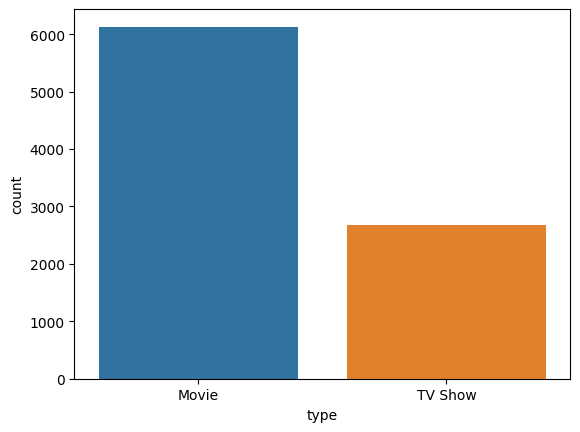

In [18]:
sns.countplot(data=df, x='type')
plt.show()

In [20]:
# Data
net_shows = df[df['type']== 'TV Show']
net_movies = df[df['type'] == 'Movie']

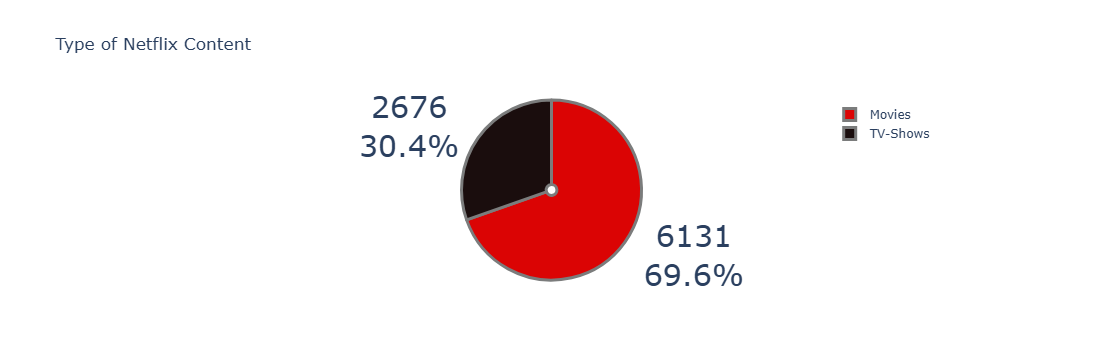

In [19]:
label = ["TV-Shows", "Movies"]

# Create the pie chart
fig = px.pie(values=no_tv_movie, names=label, hole=0.06, title='Type of Netflix Content', 
             color=label, 
             color_discrete_map={'TV-Shows': '#1A0D0D', 'Movies': '#DB0404'})

# Update hover and text formatting
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', 
                  textfont_size=30, 
                  marker=dict(line=dict(color='#7B7C7C', width=3)))

# Show the plot
fig.show()

# EDA for TV shows

## No Of Seasons

In [114]:
durations = net_shows[['title','duration']]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [116]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','').str.replace('s','').astype(int)
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


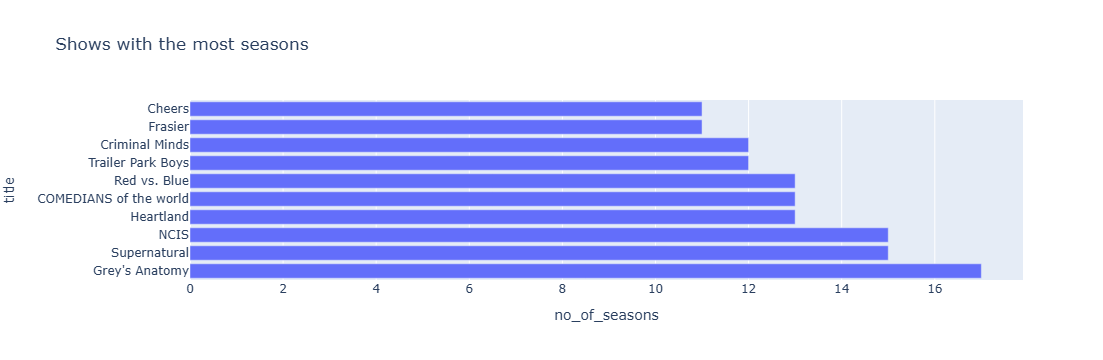

<Figure size 800x1000 with 0 Axes>

In [126]:
durations = durations.sort_values(by='no_of_seasons',ascending=False)
fig = px.bar(durations.head(10), x='no_of_seasons', y='title', orientation='h', title="Shows with the most seasons")
fig.show()

## Show Contents Update

In [31]:
net_date = net_shows[['date_added']].dropna()
net_date['date_added'] = net_date['date_added'].str.strip()
net_date['date_added'] = pd.to_datetime(net_date['date_added'], format='%B %d, %Y')
net_date['month'] = net_date['date_added'].dt.month_name()
net_date['year'] = net_date['date_added'].dt.year
net_date.head()

,date_added,month,year
1,2021-09-24,September,2021
2,2021-09-24,September,2021
3,2021-09-24,September,2021
4,2021-09-24,September,2021
5,2021-09-24,September,2021


In [34]:
month_order = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'][::-1]
nf = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
nf

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


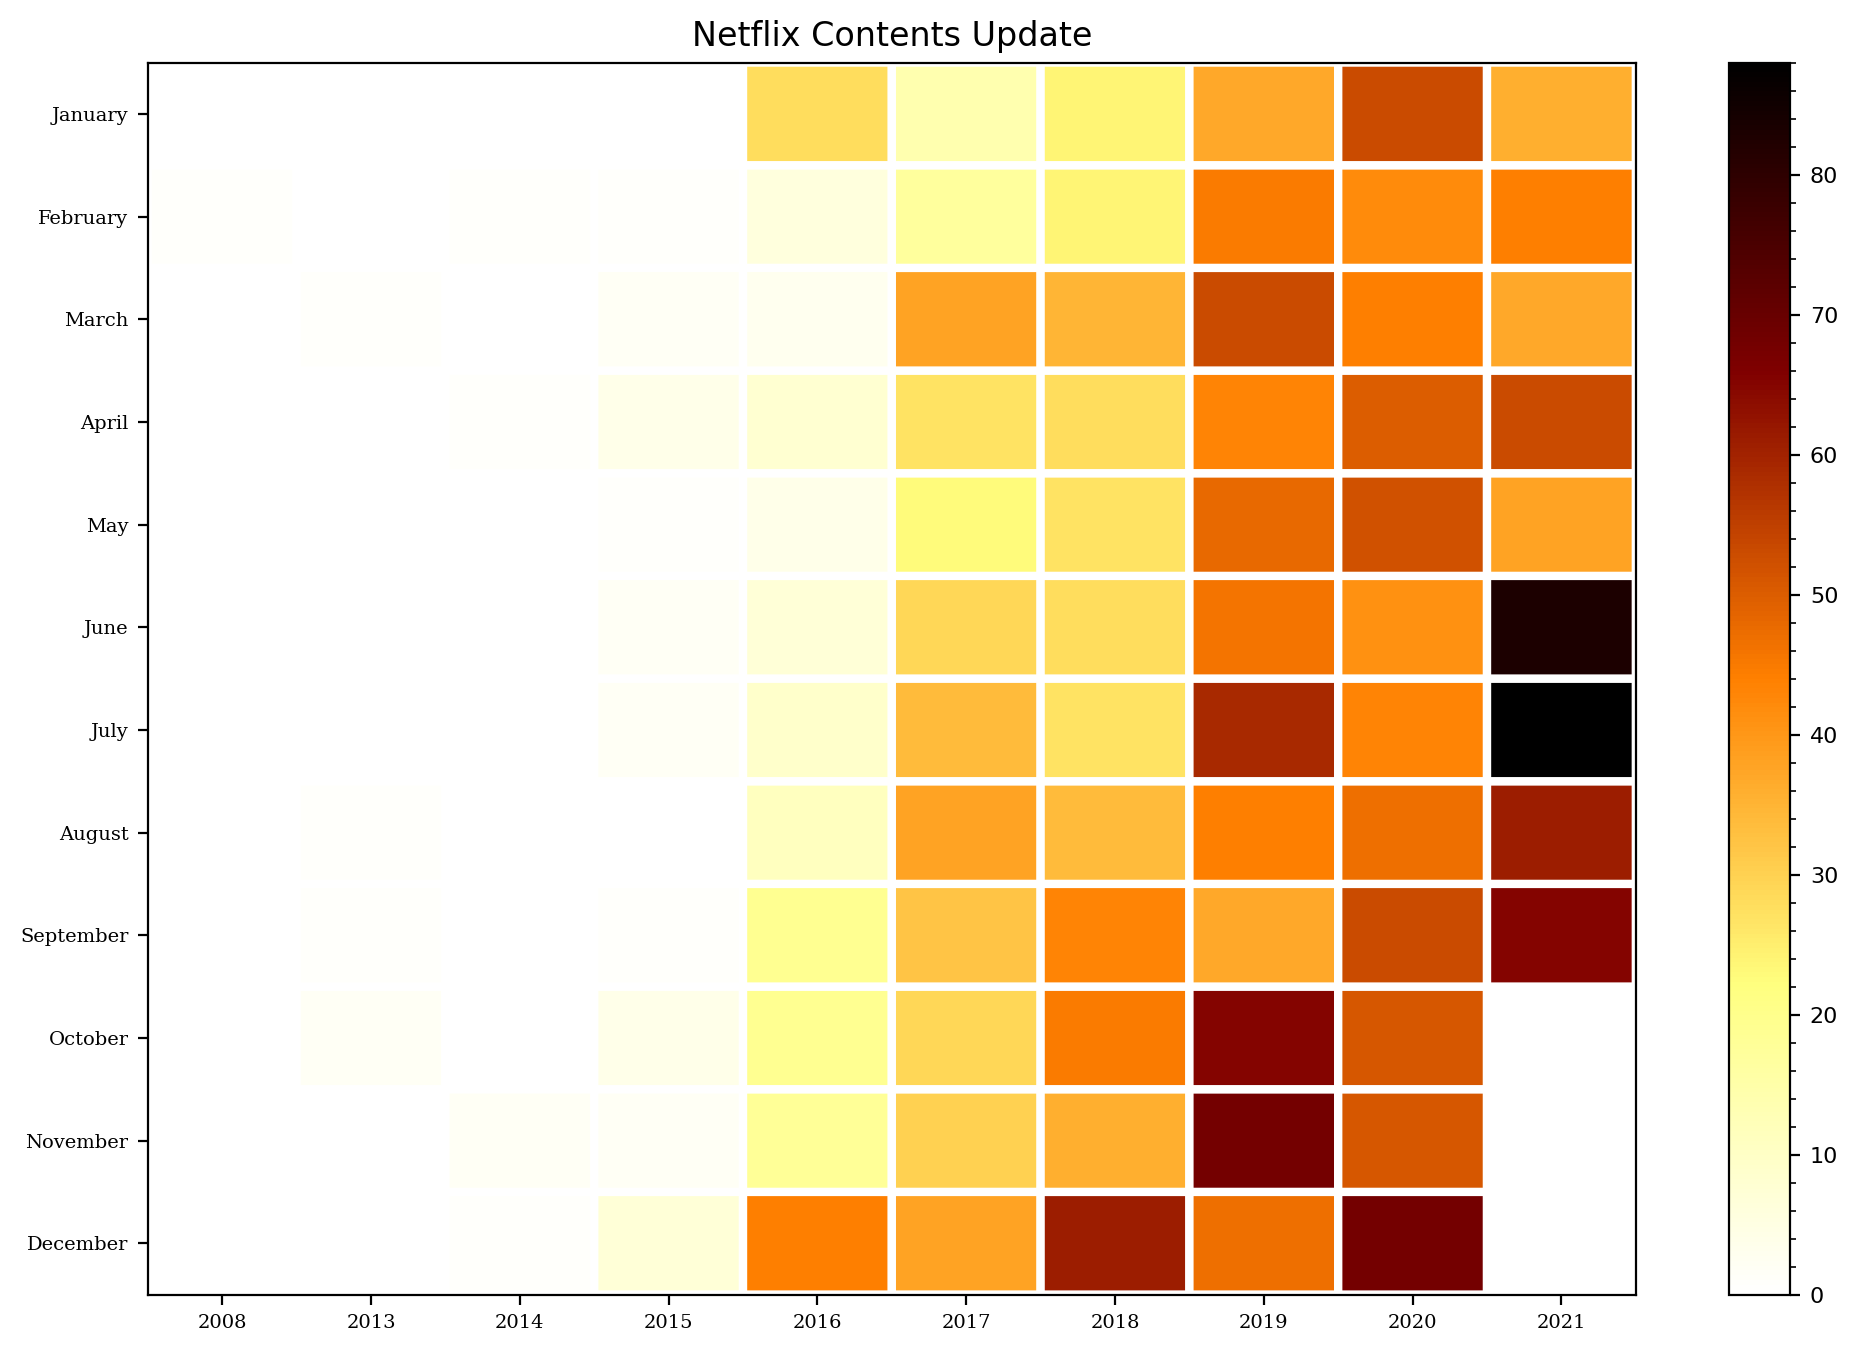

In [35]:
plt.figure(figsize=(12,8), dpi=200)
plt.pcolor(nf, cmap='afmhot_r',edgecolor='white', linewidths=3)
plt.xticks(np.arange(0.5, len(nf.columns),1), nf.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(nf.index),1), nf.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

# EDA for movies

## Movie Ratings

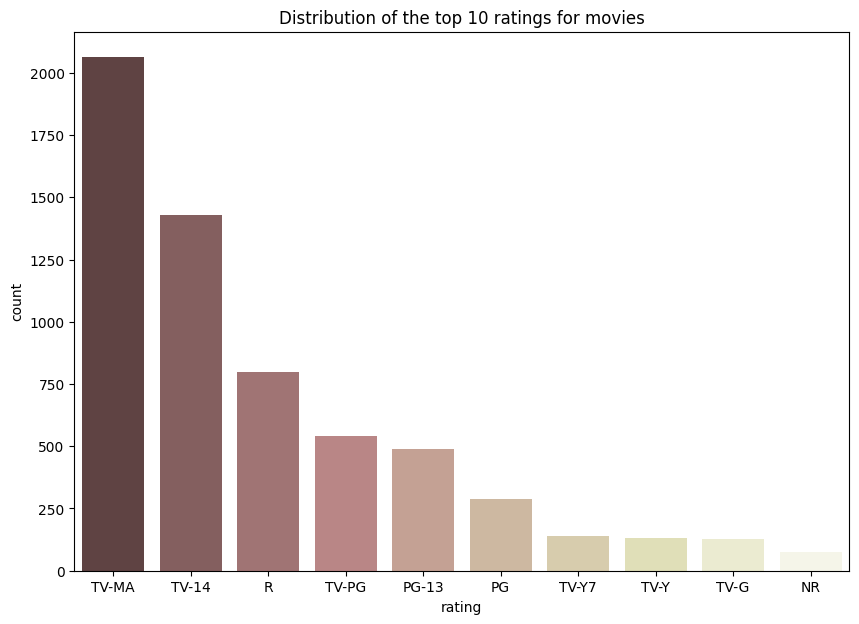

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x='rating', data=net_movies, order=net_movies['rating'].value_counts().index[:10], palette='pink')
plt.title('Distribution of the top 10 ratings for movies')
plt.show()

## Release Year

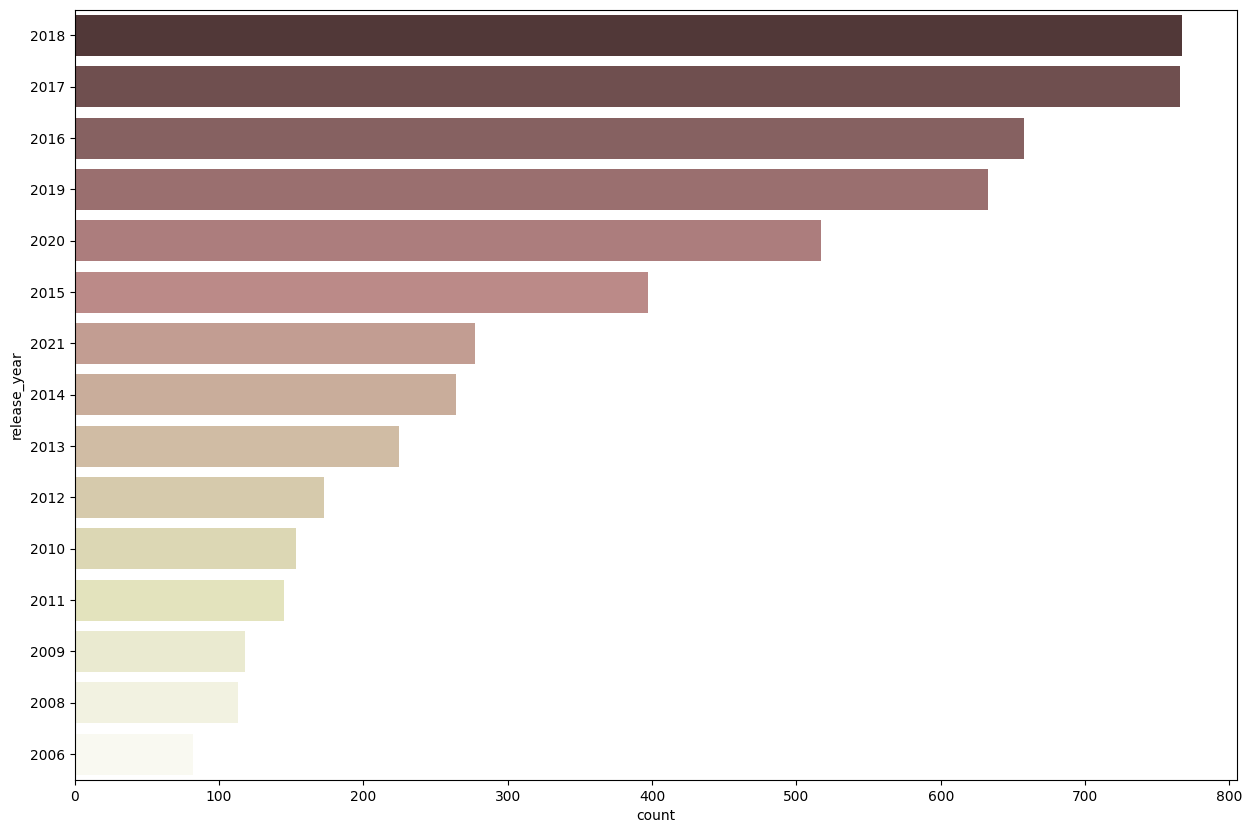

In [127]:
plt.figure(figsize=(15,10))
sns.countplot(data=net_movies, y='release_year', palette='pink', order=net_movies['release_year'].value_counts().index[:15])
plt.show()

## Duration

In [109]:
net_movies.dropna(axis=0, inplace=True, subset=['duration'])

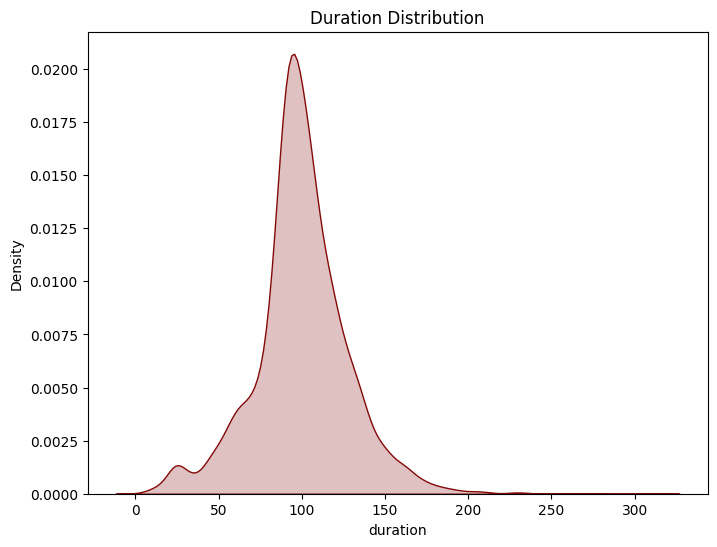

In [113]:
net_movies['duration']=net_movies['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=net_movies['duration'], color='#830908', shade=True)
plt.title('Duration Distribution')
plt.show()

## Country of origin

In [55]:
net_movies['country'] = net_movies['country'].fillna('Unknown')

In [97]:
# Method 1: Explode
df_exploded = net_movies['country'].str.split(',').explode().str.strip()
countries = df_exploded.value_counts()
countries

country
United States     2752
India              962
United Kingdom     534
Unknown            440
Canada             319
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 119, dtype: int64

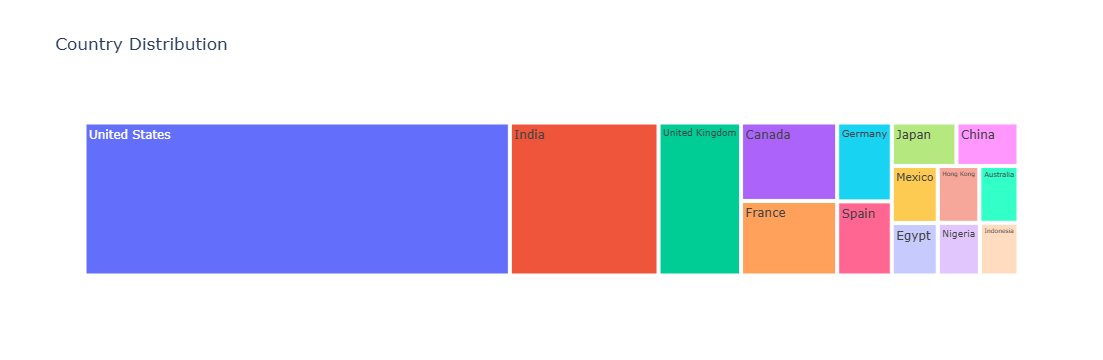

In [98]:
count = pd.DataFrame({
    'country': countries.index,
    'count': countries.values
})
count = count[~count['country'].isin(('', 'Unknown'))]
fig = px.treemap(count.head(15), 
                  path=['country'],  
                  values='count', 
                  title='Country Distribution')
fig.show()

In [99]:
# Method 2: Flatten and Counter
x = net_movies['country'].apply(lambda x: [country.strip() for country in str(x).strip().split(',')])
countries = Counter([item for sublist in x for item in sublist]).most_common()

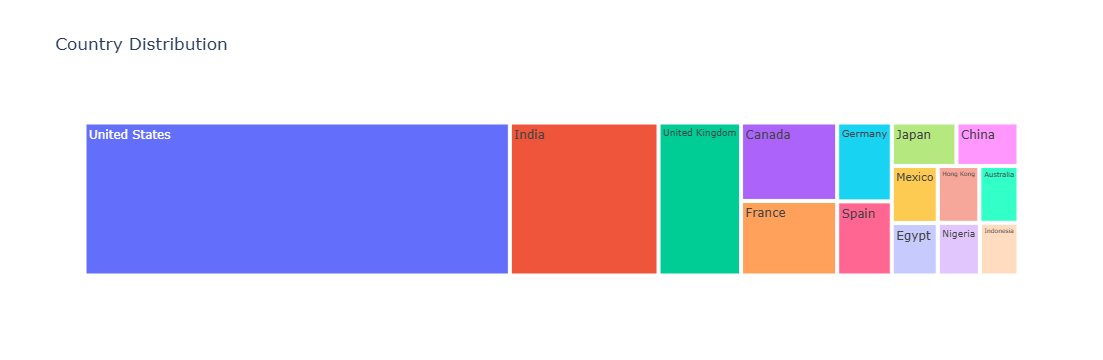

In [100]:
top = pd.DataFrame(countries)
top.columns = ['country', 'count']
top = top[~top['country'].isin(('', 'Unknown'))]
fig = px.treemap(top.head(15), 
                  path=['country'],  
                  values='count', 
                  title='')
fig.show()

## Genres

In [103]:
genres = net_movies['listed_in'].str.split(',').explode().str.strip()
genres = genres.value_counts()
genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

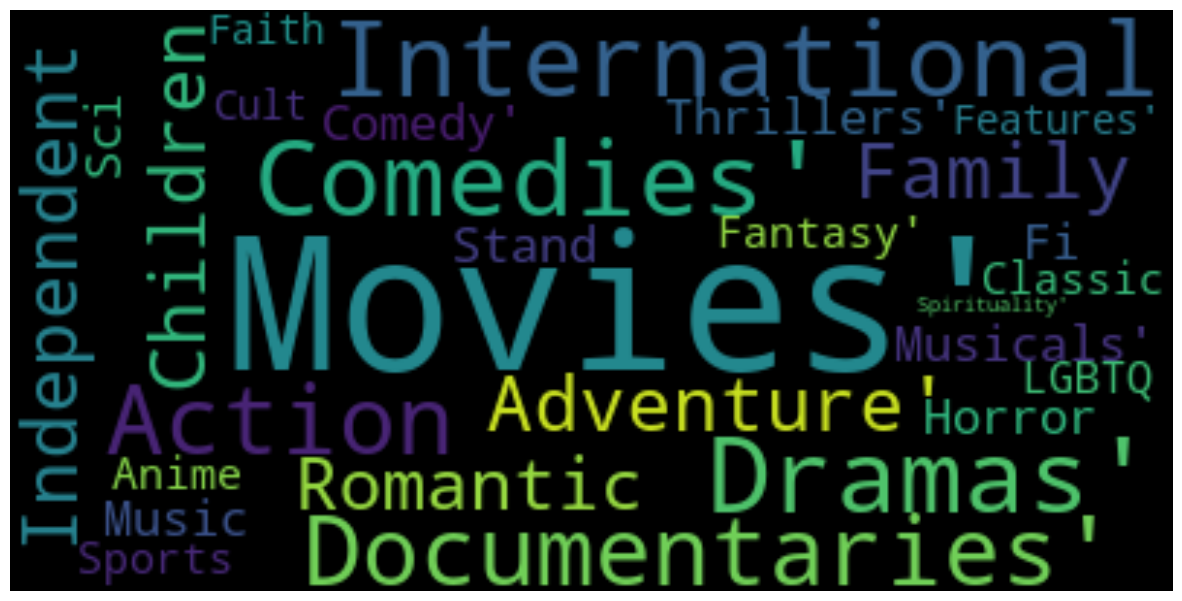

In [108]:
txt = list(genres.index)
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_words = 1000000, background_color = 'black').generate(str(txt))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Movie Reviews

In [130]:
imdb_rating = pd.read_csv('../../datasets/IMDB-Ratings.csv', usecols=['averageRating'])
imdb_title = pd.read_csv('../../datasets/imdb-top-10000-movies.csv', usecols=['title','year','genre'])

In [131]:
ratings = pd.DataFrame(
    {
        'Title': imdb_title.title,
        'Rating': imdb_rating.averageRating,
        'Genre': imdb_title.genre
    }
)
ratings.drop_duplicates(subset=['Title','Rating'], inplace=True)
ratings.shape

(9931, 3)

In [132]:
ratings.dropna()
join_tab = ratings.merge(net_movies, left_on='Title', right_on='title', how='inner')
join_tab = join_tab.sort_values(by='Rating', ascending=False)

join_tab.head()

,Title,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1294,Escape from Planet Earth,9.2,"Animation, Adventure, Comedy",s1102,Movie,Escape from Planet Earth,Cal Brunker,"Rob Corddry, Brendan Fraser, Sarah Jessica Par...","United States, Canada","April 3, 2021",2013,PG,89,"Children & Family Movies, Comedies, Sci-Fi & F...",This all-ages animated comedy follows the adve...
338,Sweeney Todd: The Demon Barber of Fleet Street,8.7,"Drama, Horror, Musical",s8139,Movie,Sweeney Todd: The Demon Barber of Fleet Street,Tim Burton,"Johnny Depp, Helena Bonham Carter, Alan Rickma...","United States, United Kingdom","January 1, 2020",2007,R,116,"Dramas, Horror Movies, Music & Musicals","After being falsely imprisoned, a vengeful mur..."
1381,The Night Clerk,8.7,"Crime, Drama, Mystery",s2417,Movie,The Night Clerk,Michael Cristofer,"Tye Sheridan, Ana de Armas, Helen Hunt, John L...",United States,"June 6, 2020",2020,R,90,"Dramas, Independent Movies","After a charming guest checks in, a voyeuristi..."
1539,The Final Destination,8.6,"Horror, Thriller",s8299,Movie,The Final Destination,David R. Ellis,"Bobby Campo, Shantel VanSanten, Nick Zano, Hal...",United States,"January 1, 2020",2009,R,82,Horror Movies,Nick O'Bannon thinks he's cheated death when h...
1473,The Green Inferno,8.5,"Adventure, Horror",s3263,Movie,The Green Inferno,Eli Roth,"Ignacia Allamand, Daryl Sabara, Nicolás Martín...","United States, Chile","November 16, 2019",2013,R,101,"Horror Movies, Independent Movies",Determined to save an Amazon tribe being squee...


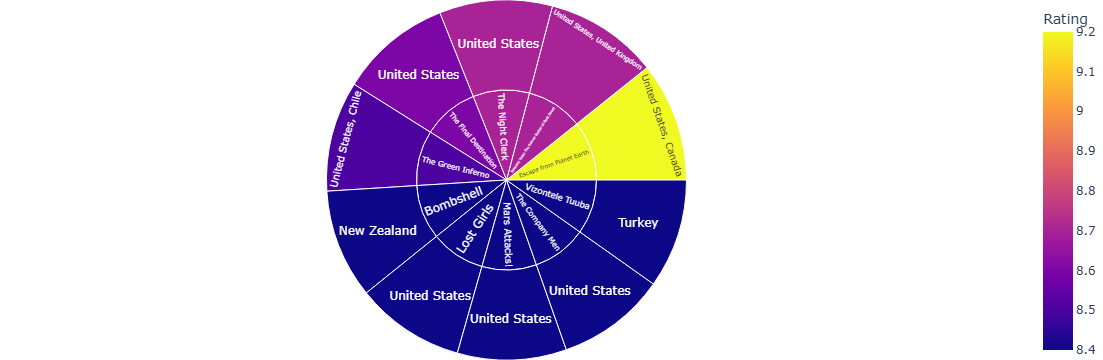

In [46]:
top_rated = join_tab[:10]

fig = px.sunburst(top_rated, path=['title', 'country'], values='Rating', color='Rating')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

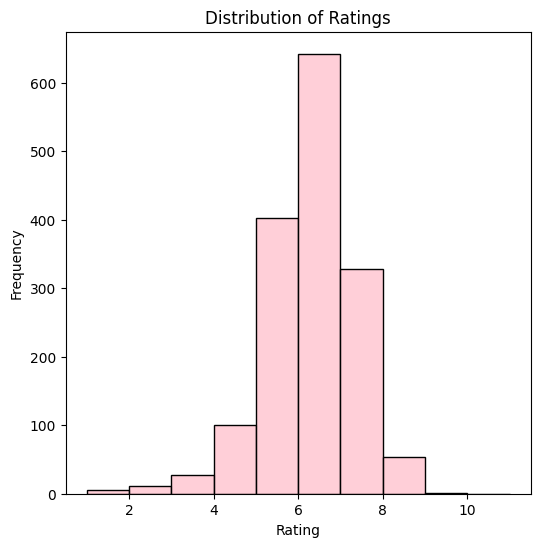

In [141]:
plt.figure(figsize=(6, 6))
sns.histplot(join_tab['Rating'], bins=range(1, 12), kde=False, color='pink', edgecolor='black')

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Show the plot
plt.show()